<a href="https://colab.research.google.com/github/bittu-roy/DogVsCatClassification/blob/master/catsvdogsclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:07<00:00, 243MB/s]
100% 1.06G/1.06G [00:07<00:00, 161MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators
train_ds= keras.utils.image_dataset_from_directory(
   directory = '/content/train',
   labels= 'inferred',
   label_mode= 'int',
   batch_size= 32,
   image_size= (256, 256)
)

validation_ds= keras.utils.image_dataset_from_directory(
   directory = '/content/test',
   labels= 'inferred',
   label_mode= 'int',
   batch_size= 32,
   image_size= (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image, label):
  image= tf.cast(image/255, tf.float32)
  return image, label

train_ds= train_ds.map(process)
validation_ds= validation_ds.map(process)

In [ ]:
# create CNN model

model= Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding= 'valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides= 2, padding= 'valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding= 'valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides= 2, padding= 'valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding= 'valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides= 2, padding= 'valid'))

model.add(Flatten())

model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation= 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(train_ds, epochs= 10, validation_data= validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 109ms/step - loss: 1.2799 - accuracy: 0.5834 - val_loss: 0.7538 - val_accuracy: 0.5614
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5857 - accuracy: 0.6975 - val_loss: 0.5940 - val_accuracy: 0.6704
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4870 - accuracy: 0.7689 - val_loss: 0.5058 - val_accuracy: 0.7600
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4246 - accuracy: 0.8055 - val_loss: 0.4727 - val_accuracy: 0.7812
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3964 - accuracy: 0.8275 - val_loss: 0.4376 - val_accuracy: 0.7914
Epoch 6/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3079 - accuracy: 0.8684 - val_loss: 0.4614 - val_accuracy: 0.8074
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2357 - accuracy: 0.9020 - val_loss: 0.6406 - val_ac

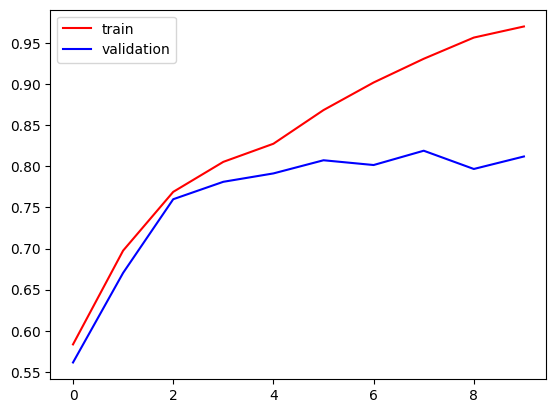

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

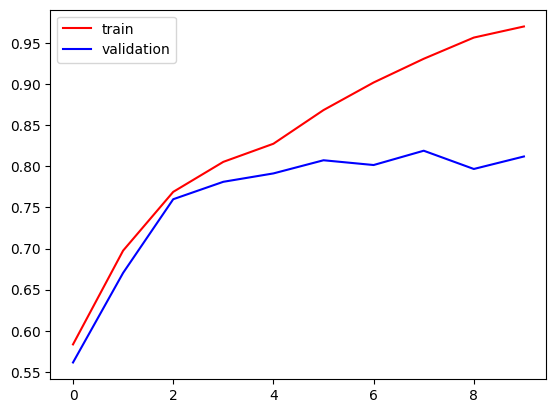

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

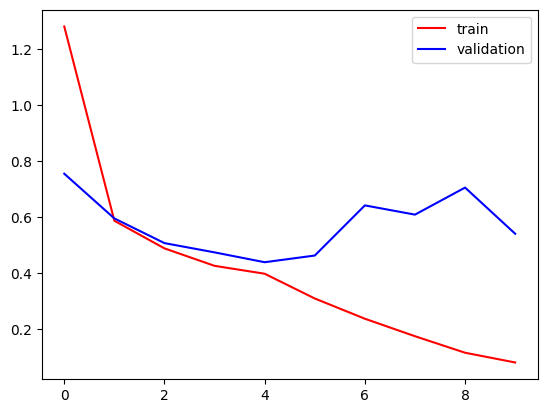

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
import cv2

In [ ]:
test_img= cv2.imread('/content/cat.png')

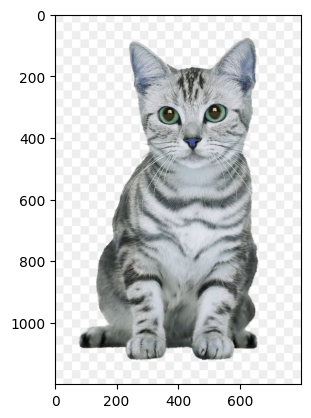

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1200, 800, 3)

In [ ]:
test_img= cv2.resize(test_img,(256, 256))

In [ ]:
test_input= test_img.reshape((1, 256, 256, 3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)